# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Aluguel de Apartamentos no EUA
### **Base de dados:** https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified


In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy import stats

# **Introdução**

Neste trabalho, analisamos um banco de dados de apartamentos disponíveis para aluguel nos Estados Unidos, buscando entender as tendências de mercado e os principais fatores colaborantes para a decisão do preço final de aluguel do imóvel.


O banco de dados é formado por 100000 apartamentos disponíveis para aluguel nos EUA, possuindo o preço do aluguel e diversos atributos do apartamento como localização, número de quartos, número de banheiros, entre outros.


O ChatGPT foi escolhido como ferramenta para auxiliar na análise dos dados, permitindo a criação de códigos e aplicação de algoritmos com maior facilidade, além de nos permitir analisar o desempenho da ferramenta automatizada nas diferentes etapas de CRISP.

# **Motivação**

A principal motivação desse projeto é o melhor entendimento das características que afetam o preço de aluguel de um apartamento, permitindo possivelmente a criação de ferramentas que auxilie na busca por apartamentos ao possibilitar a pesquisa em uma faixa de preço específico definindo atributos desejados no imóvel, além de auxiliar proprietários a estimar um valor adequado para um apartamento com base em suas características.

# **Objetivo**

## **Geral**


O objetivo deste trabalho é clusterizar apartamentos com base nos seus atributos e utilizar esses clusters para realizar uma análise de
mercado, identificando quais atributos são mais relevantes para o preço do aluguel, além de reconhecer quais atributos estão mais fortemente
relacionados.

## **Específicos**

Ainda não sei ainda, a gnt coloca com base nos resultados

# **Metodologia**

Realizar a clusterização de um dataset envolve múltiplos passos, anteriores a criação dos clusters. 


Primeiramente, é necessário adquirir o dataset apropriado para esse projeto e entender quais são os dados presentes nele e o que representam. 


Em seguida, precisamos realizar um pré-processamento dos dados, em que o dataset é limpo e normalizado, com o objetivo de evitar erros e bias, e é preparado para a aplicação de algoritmos de aprendizado de máquina não supervisionados.


Uma vez que o processo de limpeza e normalização foi realizado, podemos começar o processo de criação de cluster utilizando diferentes métodos como k-means, clusterização hierarquica etc. Com os clusters criados podemos identificar as matrizes dos diferentes clusters.


Para identificar o número de clusters apropriado para nossa análise utilizamos a técnica de Within Sum of Squares(WSS), garantindo que temos um número ótimo de clusters antes de seguirmos para a criação de um modelo.

Possuindo o dataset clusterizado, é possível entender os comportamentos e traços dos diferentes clusters com base no padrão de compra, comportamento e outros atributos.



# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


In [2]:
#Carregando a base de dados
df = pd.read_csv('./100k.csv', delimiter=';', encoding='utf-8')

/tmp/ipykernel_32255/2177396325.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./100k.csv', delimiter=';', encoding='utf-8')


In [3]:
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [5]:
print(df.describe())

                 id     bathrooms      bedrooms         price   square_feet  \
count  9.949200e+04  99429.000000  99368.000000  99491.000000  99492.000000   
mean   5.358321e+09      1.445323      1.728212   1527.057281    956.430688   
std    1.847404e+08      0.547021      0.749200    904.245882    417.571522   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.197950e+09      1.000000      1.000000   1013.000000    729.000000   
50%    5.508673e+09      1.000000      2.000000   1350.000000    900.000000   
75%    5.509007e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           latitude     longitude          time  
count  99467.000000  99467.000000  9.949200e+04  
mean      36.947988    -91.568656  1.559665e+09  
std        4.599461     15.817168  1.105077e+07  
min       19.573800   -159.369800  1.544174e+09  
25%       33.746500   -104.791900  1.5

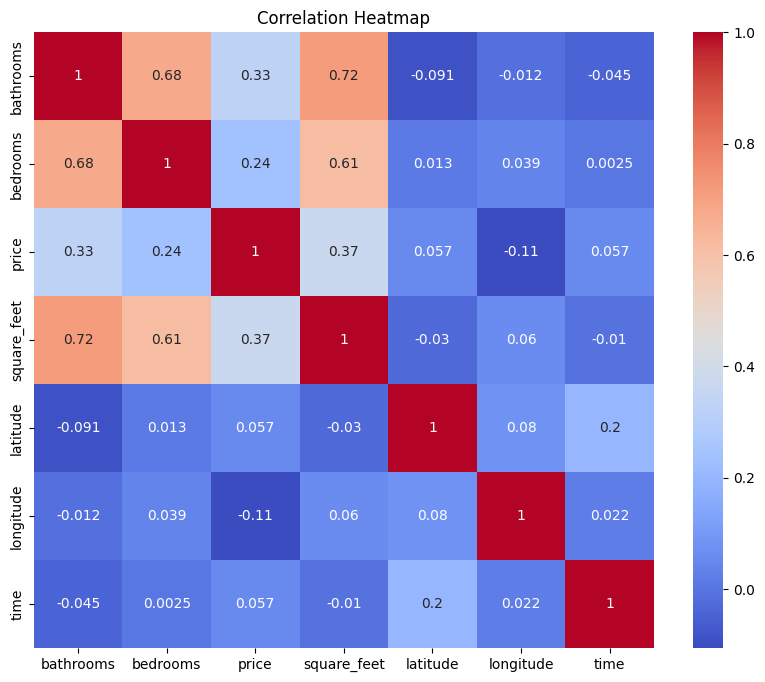

In [6]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Create a correlation heatmap for numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


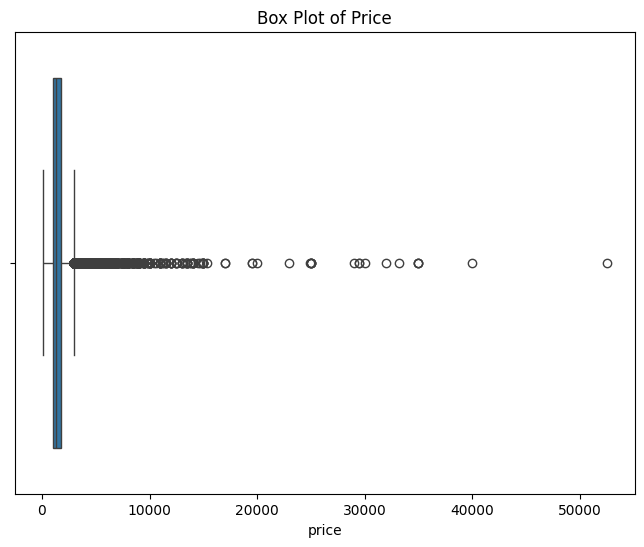

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Price')
plt.show()

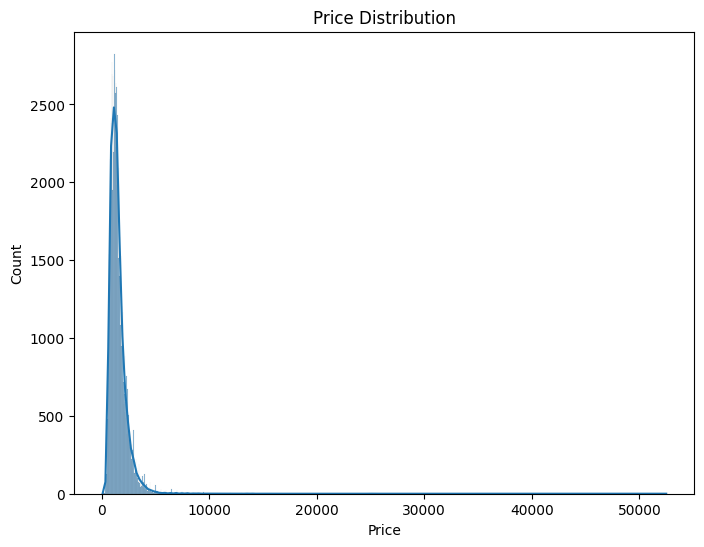

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [9]:
print((df['price'] > 5000).sum())

477


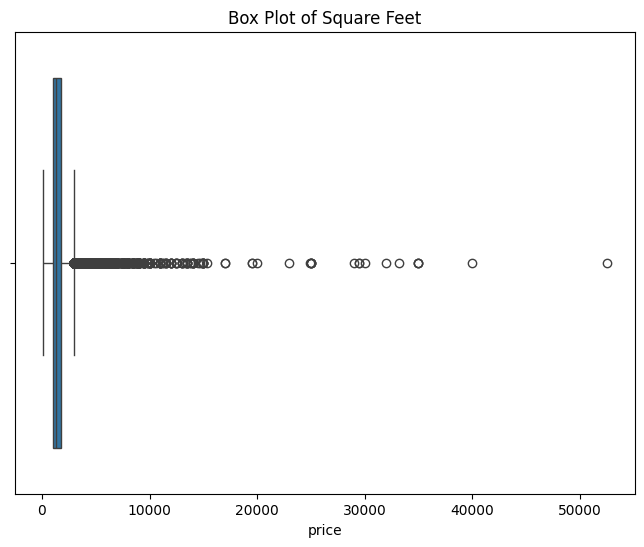

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Square Feet')
plt.show()

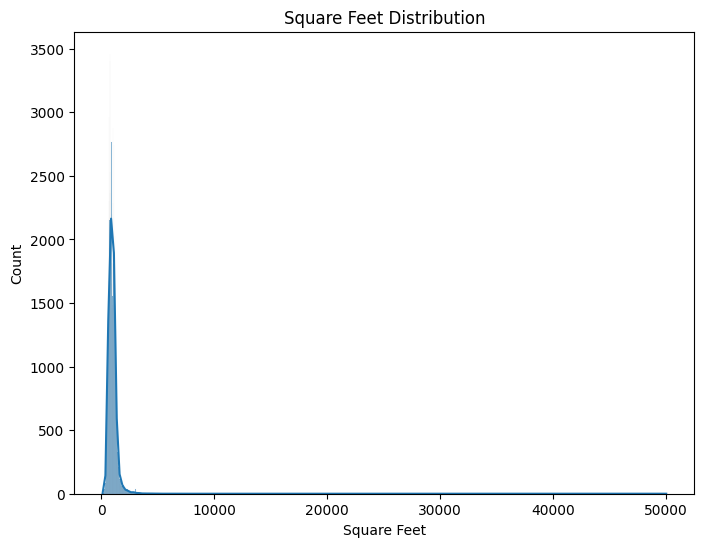

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['square_feet'], kde=True)
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.show()

In [12]:
print((df['square_feet'] > 2500).sum())

672


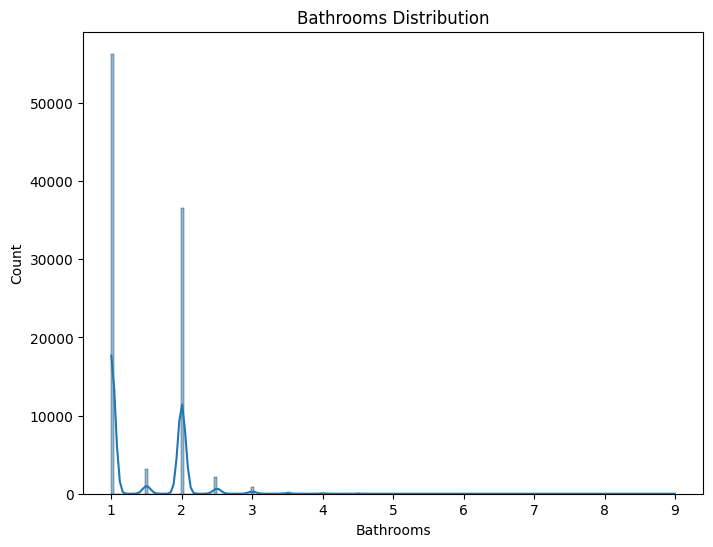

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()

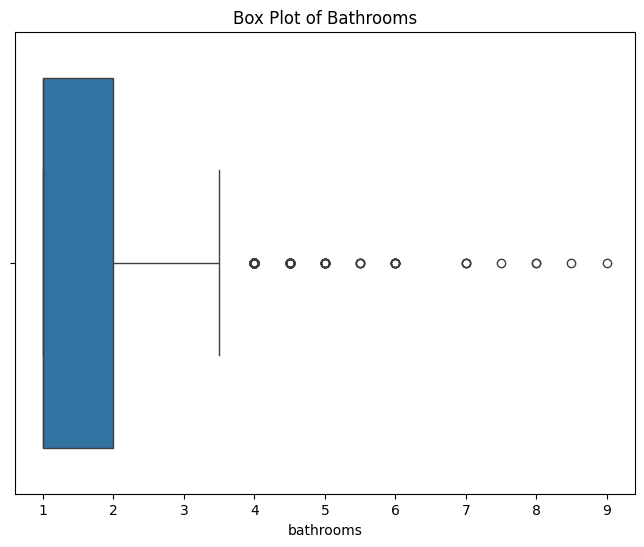

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot of Bathrooms')
plt.show()

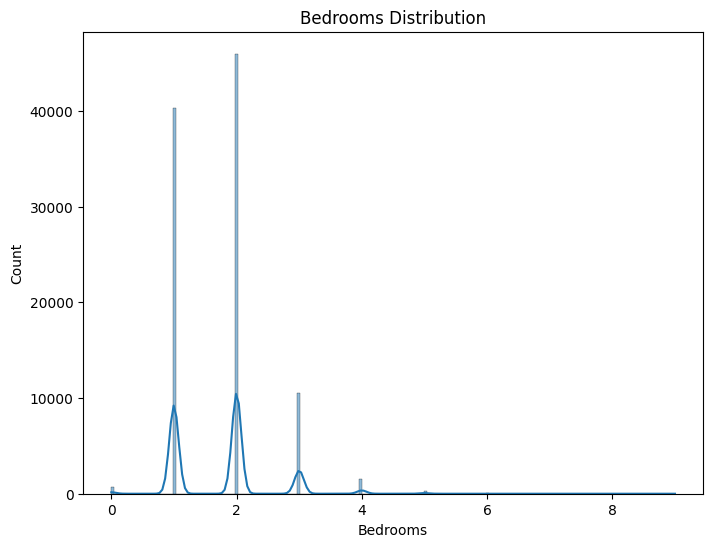

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()

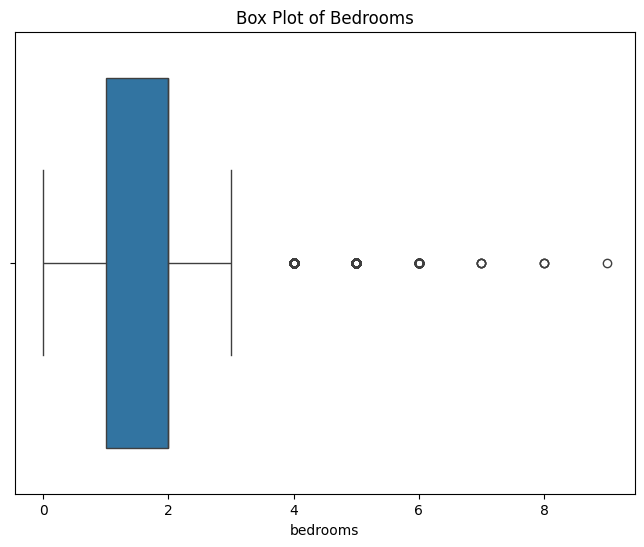

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', data=df)
plt.title('Box Plot of Bedrooms')
plt.show()

In [17]:
unique_pets_allowed = df['pets_allowed'].unique()

# Print the unique values
print(unique_pets_allowed)

['Cats' 'Cats,Dogs' nan 'Dogs' 'Cats,Dogs,None']


In [18]:
unique_amenities = df['amenities'].unique()

# Print the unique values
print(unique_amenities)
print(len(unique_amenities))

[nan 'Fireplace,Gym,Parking,Pool,Storage,Wood Floors' 'Gated,Pool' ...
 'Dishwasher,Doorman' 'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer'
 'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors']
9828


In [19]:
combined_amenities = ', '.join(df['amenities'].dropna())

# Split the combined string by commas and create a list of words
word_list = [word.strip() for word in combined_amenities.split(',')]

# Get the unique words by converting the list to a set
unique_words = set(word_list)

# Print the unique words
print(unique_words)
print(len(unique_words))

{'Doorman', 'Wood Floors', 'Hot Tub', 'Washer Dryer', 'Basketball', 'Gated', 'Alarm', 'AC', 'Gym', 'Clubhouse', 'Patio/Deck', 'Storage', 'Parking', 'Fireplace', 'Elevator', 'TV', 'Pool', 'Internet Access', 'View', 'Dishwasher', 'Refrigerator', 'Garbage Disposal', 'Golf', 'Tennis', 'Luxury', 'Playground', 'Cable or Satellite'}
27


## **3. Data preparation (Preparação dos dados)**

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


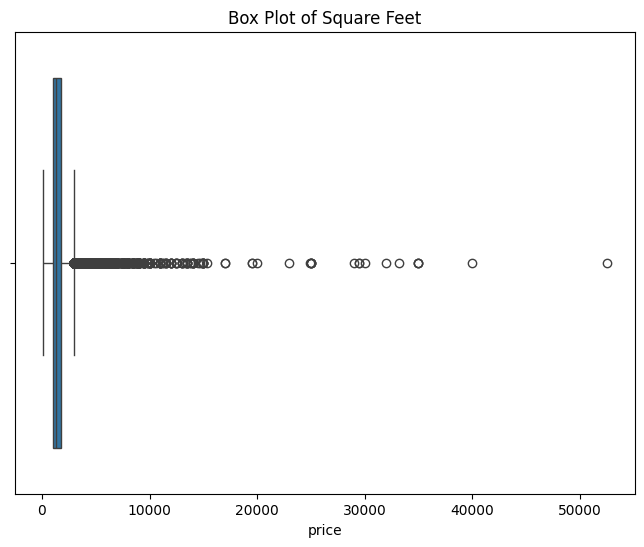

In [21]:
# Create a box plot for 'square_feet'
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Square Feet')
plt.show()

O grande número de valores "nulos" para as colunas amenities, pets_allowed pode se dever ao fato dessa base de dados indicar valores negativos como nulos. No caso dos pets_allowed, por exemplo, valores do tipo None podem indicar que pets não são permitidos.

In [22]:
#df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms', 'pets_allowed', 'amenities', 'cityname', 'state', 'latitude', 'longitude']]
#df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms', 'latitude', 'longitude']]
#df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms']]
df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms', 'cityname', 'state']]
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,cityname,state
0,542,2195.0,1.0,1.0,Redondo Beach,CA
1,1500,1250.0,1.5,3.0,Newport News,VA
2,1650,1395.0,2.0,3.0,Raleigh,NC
3,820,1600.0,1.0,2.0,Vacaville,CA
4,624,975.0,1.0,1.0,Albuquerque,NM


In [23]:
# List of columns to check for null values
#columns_to_check = ['bathrooms', 'bedrooms', 'price', 'cityname', 'state', 'latitude', 'longitude']
columns_to_check = ['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude']
columns_to_check = ['bathrooms', 'bedrooms', 'price']

# Remove rows with null values in any of the specified columns
df_filtered = df_filtered.dropna(subset=columns_to_check)
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,cityname,state
0,542,2195.0,1.0,1.0,Redondo Beach,CA
1,1500,1250.0,1.5,3.0,Newport News,VA
2,1650,1395.0,2.0,3.0,Raleigh,NC
3,820,1600.0,1.0,2.0,Vacaville,CA
4,624,975.0,1.0,1.0,Albuquerque,NM


In [24]:
# Apply one-hot encoding to 'cityname' and 'state'
df_filtered = pd.get_dummies(df_filtered, columns=['cityname', 'state'], prefix=['city', 'state'])
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,city_Abbeville,city_Aberdeen,city_Abilene,city_Abingdon,city_Abington,city_Absecon,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,542,2195.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1500,1250.0,1.5,3.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1650,1395.0,2.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,820,1600.0,1.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,624,975.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
columns_with_outliers = ['price', 'square_feet']

# Remove outliers using the IQR method for each column
for column in columns_with_outliers:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers in the current column
    df_filtered = df_filtered.loc[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

In [26]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

square_feet       0
price             0
bathrooms         0
bedrooms          0
city_Abbeville    0
                 ..
state_VT          0
state_WA          0
state_WI          0
state_WV          0
state_WY          0
Length: 3032, dtype: int64


In [27]:
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,city_Abbeville,city_Aberdeen,city_Abilene,city_Abingdon,city_Abington,city_Absecon,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,542,2195.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1500,1250.0,1.5,3.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1650,1395.0,2.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,820,1600.0,1.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,624,975.0,1.0,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92387 entries, 0 to 99491
Columns: 3032 entries, square_feet to state_WY
dtypes: bool(3028), float64(3), int64(1)
memory usage: 270.3 MB


In [29]:
df_filtered.describe()

,square_feet,price,bathrooms,bedrooms
count,92387.000000,92387.000000,92387.000000,92387.000000
mean,907.973211,1391.544341,1.399916,1.665808
std,253.637642,523.304655,0.499841,0.676805
min,175.000000,100.000000,1.000000,0.000000
25%,720.000000,995.000000,1.000000,1.000000
50%,883.000000,1305.000000,1.000000,2.000000
75%,1091.000000,1695.000000,2.000000,2.000000
max,1662.000000,2966.000000,4.000000,6.000000


Foram selecionadas as colunas que foram julgadas utéis para a clusterização e retirou-se os valores nulos que indicavam de fato valores faltantes. Nesse contexto, assumiu-se que os valores nulos nas colunas pets_allowed e amenities se referem a valores 'Falsos' e não nulos.

In [30]:
""" 
# Create separate scalers for different types of attributes
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Define which columns to normalize with each scaler
min_max_columns = ['square_feet', 'price']
robust_columns = ['bedrooms', 'bathrooms']

# Apply the respective scalers to the selected columns
df_filtered[min_max_columns] = min_max_scaler.fit_transform(df_filtered[min_max_columns])
df_filtered[robust_columns] = robust_scaler.fit_transform(df_filtered[robust_columns])
 """

" \n# Create separate scalers for different types of attributes\nmin_max_scaler = MinMaxScaler()\nrobust_scaler = RobustScaler()\n\n# Define which columns to normalize with each scaler\nmin_max_columns = ['square_feet', 'price']\nrobust_columns = ['bedrooms', 'bathrooms']\n\n# Apply the respective scalers to the selected columns\ndf_filtered[min_max_columns] = min_max_scaler.fit_transform(df_filtered[min_max_columns])\ndf_filtered[robust_columns] = robust_scaler.fit_transform(df_filtered[robust_columns])\n "

## **4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [31]:
X = df_filtered

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

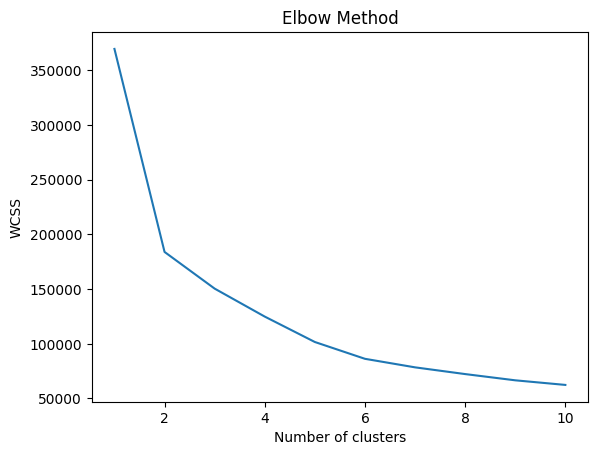

In [ ]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [ ]:
k = 6 # Your chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Add the cluster labels to your DataFrame
labels = kmeans.labels_


## **5. Evaluation (Validação)**


In [ ]:
silhouette_avg = silhouette_score(df_filtered, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0970286239806057


In [ ]:
davies_bouldin = davies_bouldin_score(df_filtered, labels)

print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 1.7928939020729242


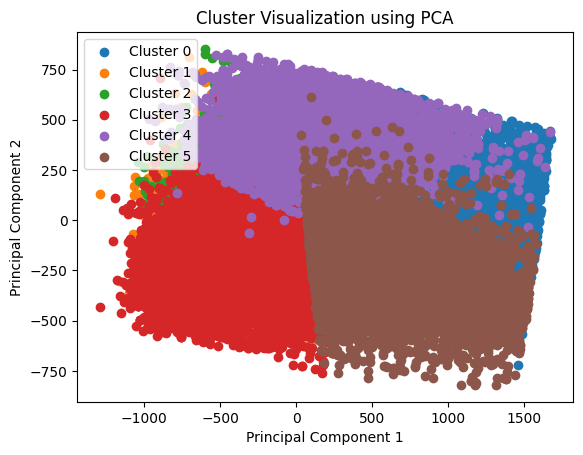

In [ ]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_filtered)

# Create a scatter plot for each cluster
for cluster_label in set(labels):
    # Select data points belonging to the current cluster
    cluster_data = data_pca[labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')

# Add labels and a legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Cluster Visualization using PCA')
plt.show()

**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.